# $k$-NN classifier 

Based on the Python library **sklean**





In [ ]:
# Import all required Python packages. 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

### Iris dataset 

Loads the dataset from the sklearn package 

In [ ]:
# Loads the dataset
iris = datasets.load_iris()

# features: 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'
# Select two features: Sepal Width, Petal Width in the dataset 
X = iris.data[:, [1, 3]] 
y = iris.target 

print(X.shape)
print(y.shape)

print(y[1:4])

(150, 2)
(150,)
[0 0 0]



Splits the data into train and test set via *stratified sampling* 


In [ ]:

X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size=0.333, random_state=0, stratify=y)

print(X_trn.shape)
print(X_test.shape)


(100, 2)
(50, 2)


Visualize the Iris training data ($n = 100, d = 2$) using scatterplot

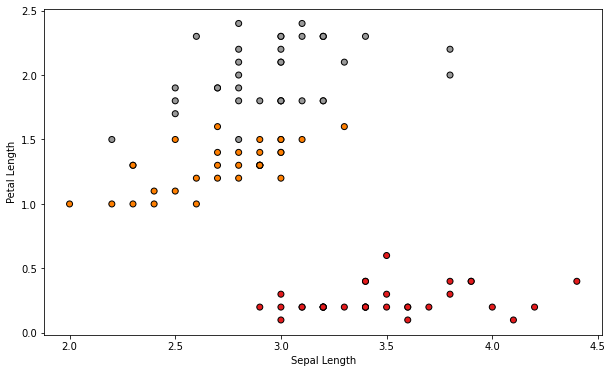

In [ ]:

plt.figure(2, figsize=(10, 6))
plt.clf()
plt.scatter(X_trn[:, 0], X_trn[:, 1], c=y_trn, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

### Creates a $k$-NN classifier object 

Number of neighbors are set as $k = 12$. The $k$-NN model is built using the training data. 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_trn, y_trn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

### Predict class labels for training data 

In [ ]:
y_trn_pred = knn.predict(X_trn)
trn_acc = accuracy_score(y_trn_pred, y_trn)

print('train accuracy:', trn_acc)

train accuracy: 0.97


### Predict class labels for test data 

In [ ]:
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test_pred, y_test)

print('test accuracy:', test_acc)

test accuracy: 0.94


# $k$-NN regression 

Adapted from [sklearn example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html)

We first generate a synthetic data.  

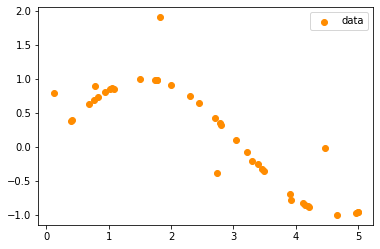

In [ ]:
X = np.sort(5 * np.random.rand(40, 1), axis=0) # x-axis 
y = np.sin(X).ravel() # y-axis 
y[::5] += 2 * (0.5 - np.random.rand(8)) # Add noise to every 5th target 

plt.scatter(X, y, color='darkorange', label='data')
plt.legend()
plt.show()

We now generate $500$ test datapoints. 

In [ ]:
X_test = np.linspace(0, 5, 500)[:, np.newaxis]

print(len(X_test))

500


Fit the regression model 

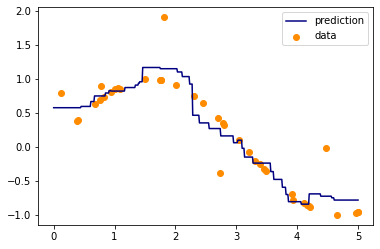

In [ ]:

n_neighbors = 5 # Sets k 
knn_reg = KNeighborsRegressor(n_neighbors) # default is Euclidean distance 
y_pred = knn_reg.fit(X, y).predict(X_test)


plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', label='prediction')
plt.legend()
plt.show()